In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
"""
Input the unique ID
"""
UNIQUE_ID = "3:3"

In [3]:
train_data = np.load(f"/mdfsvc/SDMS/data/numpy/receive_checker_train_combined_data_{UNIQUE_ID}.npy")

In [10]:
# Define column names
columns = ["exnm", "code", "type", "T_class", "receive_count"]

# Convert train data to DataFrame
train_df = pd.DataFrame(train_data, columns=columns)

# Display train data
train_df.head(10)

,exnm,code,type,T_class,receive_count
0,1,1,1,708,62
1,1,2,1,708,80
2,1,3,1,708,3
3,1,4,1,708,14
4,1,5,1,708,52
5,1,6,1,708,97
6,1,7,1,708,93
7,1,8,1,708,63
8,1,9,1,708,27
9,1,10,1,708,95


In [5]:
anomaly_data_exists = True
try:
    anomaly_data = np.load(f"/mdfsvc/SDMS/data/numpy/receive_checker_anomly_combined_data_{UNIQUE_ID}.npy")

    if anomaly_data.size <= 0:
        anomaly_data_exists = False
except FileNotFoundError:
    anomaly_data_exists = False

anomaly_data_exists

False

In [6]:
# Perform PCA(3D)
pca = PCA(n_components=3)
scaler = StandardScaler()
X = scaler.fit_transform(train_data)
train_data_pca = pca.fit_transform(X)

columns = ["Com1", "Com2", "Com3"]
train_pca_df = pd.DataFrame(train_data_pca, columns=columns)
train_pca_df.head()

,Com1,Com2,Com3
0,1.795029,-0.426805,0.621925
1,2.068308,-0.691330,0.174656
2,0.320418,0.252723,1.578316
3,0.444768,0.077251,1.267430
4,1.143557,-0.441711,0.430492


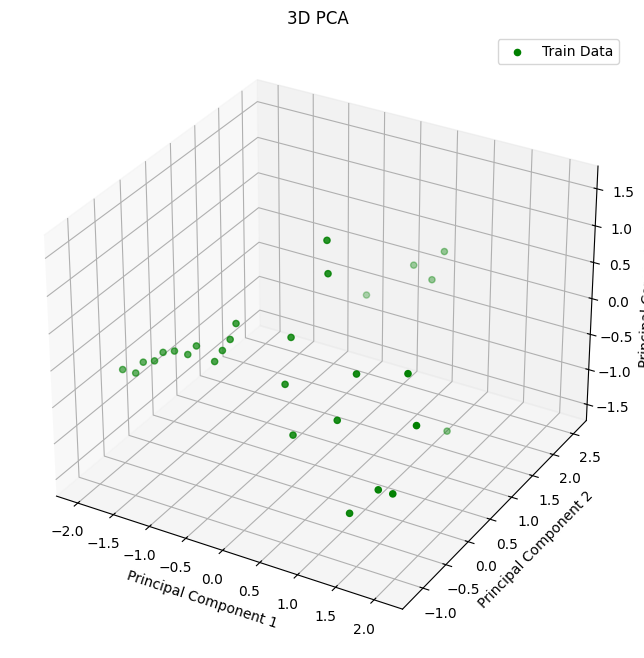

In [7]:
# Plot train data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_data_pca[:, 0], train_data_pca[:, 1], zs=train_data_pca[:, 2], c='green', marker='o', lw=1, label='Train Data')

# Plot anomaly data if exists
if anomaly_data_exists:
    XX = scaler.fit_transform(anomaly_data)
    anomaly_data_pca = pca.transform(XX)
    ax.scatter(anomaly_data_pca[:, 0], anomaly_data_pca[:, 1], anomaly_data_pca[:, 2], c='red', marker='x', label='Anomaly Data')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA')
plt.legend()
plt.show()

In [8]:
# Perform PCA(2D)
pca = PCA(n_components=2)
scaler = StandardScaler()
X = scaler.fit_transform(train_data)
train_data_pca = pca.fit_transform(X)

columns = ["Com1", "Com2"]
train_pca_df = pd.DataFrame(train_data_pca, columns=columns)
train_pca_df.head()

,Com1,Com2
0,1.795029,-0.426805
1,2.068308,-0.691330
2,0.320418,0.252723
3,0.444768,0.077251
4,1.143557,-0.441711


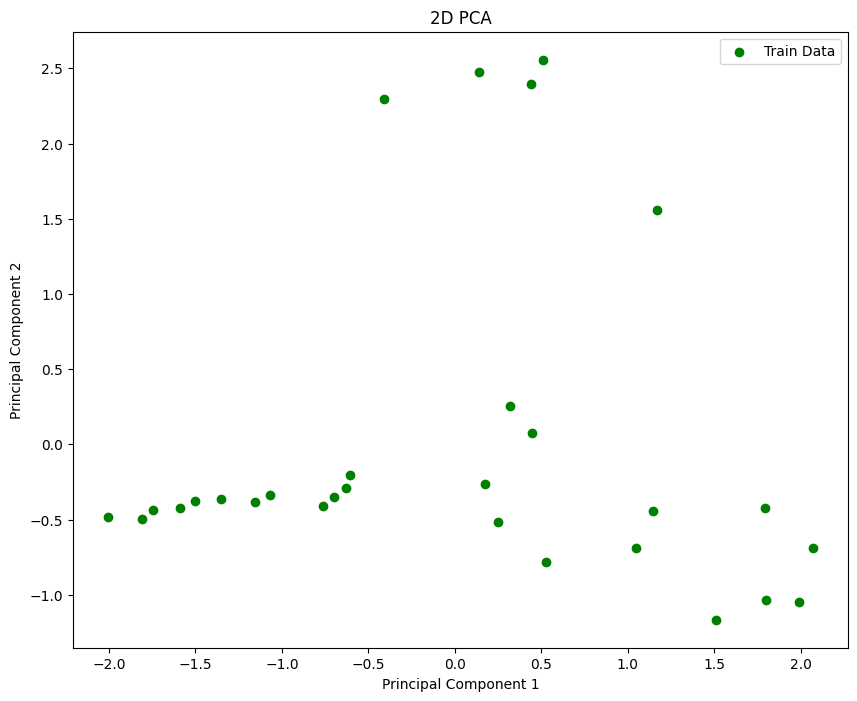

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(train_data_pca[:, 0], train_data_pca[:, 1], c='green', marker='o', lw=1, label='Train Data')

# Plot anomaly data if exists
if anomaly_data_exists:
    anomaly_data_pca = pca.transform(anomaly_data)
    plt.scatter(anomaly_data_pca[:, 0], anomaly_data_pca[:, 1], c='red', marker='x', label='Anomaly Data')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA')
plt.legend()
plt.show()